# Experiment No. 4

Importing the Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset for these experiment you need to download the dataset from these link -> [Dataset](https://drive.google.com/file/d/11eBLu2bsi-RJXzD0aKdc0D0ik5jqb7U2/view?usp=drive_link)

Download the Dataset and Upload in the Notebook and then Run.

In [ ]:
df=pd.read_csv("./facebook.csv")
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1098141.0,26.0,12.0,1987.0,2.0,male,89.0,8.0,NaN,2,7.0,0,2,2.0,5.0
2,1888105.0,43.0,16.0,1970.0,12.0,male,280.0,8.0,7.0,2,3.0,0,3,2.0,0.0
3,1335988.0,65.0,26.0,1948.0,5.0,male,66.0,8.0,4.0,2,3.0,0,2,2.0,1.0
4,1889953.0,69.0,5.0,1944.0,7.0,male,1021.0,8.0,4.0,2,68.0,0,28,2.0,40.0


### View Dimensions of the Dataset

In [ ]:
df.shape

(53, 15)

### Summary of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  52 non-null     int64  
 1   userid                 52 non-null     float64
 2   age                    52 non-null     float64
 3   dob_day                52 non-null     float64
 4   dob_year               52 non-null     float64
 5   dob_month              52 non-null     float64
 6   gender                 52 non-null     object 
 7   tenure                 52 non-null     float64
 8   friend_count           52 non-null     float64
 9   friendships_initiated  52 non-null     float64
 10  likes                  52 non-null     object 
 11  likes_received         52 non-null     float64
 12  mobile_likes           52 non-null     object 
 13  mobile_likes_received  52 non-null     object 
 14  www_likes              52 non-null     float64
 15  www_like

### Review the Dataset

In [ ]:
df.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1098141.0,26.0,12.0,1987.0,2.0,male,89.0,8.0,NaN,2,7.0,0,2,2.0,5.0
2,1888105.0,43.0,16.0,1970.0,12.0,male,280.0,8.0,7.0,2,3.0,0,3,2.0,0.0
3,1335988.0,65.0,26.0,1948.0,5.0,male,66.0,8.0,4.0,2,3.0,0,2,2.0,1.0
4,1889953.0,69.0,5.0,1944.0,7.0,male,1021.0,8.0,4.0,2,68.0,0,28,2.0,40.0
5,2138024.0,70.0,18.0,1943.0,7.0,male,1545.0,8.0,5.0,2,6.0,0,1,2.0,5.0
6,1152647.0,49.0,5.0,1964.0,2.0,female,1110.0,8.0,3.0,2,NaN,1,0,1.0,0.0
7,1990308.0,68.0,30.0,1945.0,8.0,male,321.0,8.0,4.0,2,2.0,1,0,1.0,2.0
8,1594737.0,16.0,9.0,1997.0,6.0,male,1041.0,8.0,6.0,2,0.0,2,na,0.0,0.0
9,1209757.0,18.0,3.0,1995.0,12.0,male,28.0,8.0,6.0,2,0.0,2,0,0.0,0.0


### Checking for the Missing Values

In [ ]:
df.isna().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [ ]:
df.dropna(how="all",inplace=True)

In [ ]:
df.fillna(method="bfill",inplace=True)

### Descriptive Statistics with Describe Function

In [ ]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,www_likes,www_likes_received
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000
mean,1.590496e+06,38.557692,13.807692,1974.442308,6.096154,424.269231,8.0,5.057692,3.461538,0.903846,1.711538
std,3.252860e+05,21.066108,9.111592,21.066108,3.625939,493.356337,0.0,2.173039,9.661855,1.124759,5.855571
min,1.043991e+06,13.000000,1.000000,1905.000000,1.000000,1.000000,8.0,0.000000,0.000000,0.000000,0.000000
25%,1.332531e+06,22.000000,5.750000,1958.000000,2.750000,46.000000,8.0,4.000000,0.000000,0.000000,0.000000
50%,1.596930e+06,32.000000,14.000000,1981.000000,7.000000,283.500000,8.0,5.000000,1.000000,0.000000,0.000000
75%,1.768256e+06,55.000000,20.000000,1991.000000,8.000000,502.750000,8.0,7.000000,2.250000,2.000000,1.000000
max,2.169730e+06,108.000000,31.000000,2000.000000,12.000000,1679.000000,8.0,8.000000,68.000000,3.000000,40.000000


### Summary Statistics of Character Column

In [ ]:
df.describe(include=["object"])

,gender,likes,mobile_likes,mobile_likes_received
count,52,52,52,52
unique,2,3,5,9
top,male,2,2,0
freq,42,37,23,25


### Summary Statistics of all Column

In [ ]:
df.describe(include="all")

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52,52.000000,52.0,52.000000,52,52.000000,52,52,52.000000,52.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,3,NaN,5,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,male,NaN,NaN,NaN,2,NaN,2,0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,37,NaN,23,25,NaN,NaN
mean,1.590496e+06,38.557692,13.807692,1974.442308,6.096154,NaN,424.269231,8.0,5.057692,NaN,3.461538,NaN,NaN,0.903846,1.711538
std,3.252860e+05,21.066108,9.111592,21.066108,3.625939,NaN,493.356337,0.0,2.173039,NaN,9.661855,NaN,NaN,1.124759,5.855571
min,1.043991e+06,13.000000,1.000000,1905.000000,1.000000,NaN,1.000000,8.0,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
25%,1.332531e+06,22.000000,5.750000,1958.000000,2.750000,NaN,46.000000,8.0,4.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000
50%,1.596930e+06,32.000000,14.000000,1981.000000,7.000000,NaN,283.500000,8.0,5.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000
75%,1.768256e+06,55.000000,20.000000,1991.000000,8.000000,NaN,502.750000,8.0,7.000000,NaN,2.250000,NaN,NaN,2.000000,1.000000


## Visualizations

### Plot Histogram

In [ ]:
df

,index,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1,1098141.0,26.0,12.0,1987.0,2.0,male,89.0,8.0,7.0,2,7.0,0,2,2.0,5.0
1,2,1888105.0,43.0,16.0,1970.0,12.0,male,280.0,8.0,7.0,2,3.0,0,3,2.0,0.0
2,3,1335988.0,65.0,26.0,1948.0,5.0,male,66.0,8.0,4.0,2,3.0,0,2,2.0,1.0
3,4,1889953.0,69.0,5.0,1944.0,7.0,male,1021.0,8.0,4.0,2,68.0,0,28,2.0,40.0
4,5,2138024.0,70.0,18.0,1943.0,7.0,male,1545.0,8.0,5.0,2,6.0,0,1,2.0,5.0
5,6,1152647.0,49.0,5.0,1964.0,2.0,female,1110.0,8.0,3.0,2,2.0,1,0,1.0,0.0
6,7,1990308.0,68.0,30.0,1945.0,8.0,male,321.0,8.0,4.0,2,2.0,1,0,1.0,2.0
7,8,1594737.0,16.0,9.0,1997.0,6.0,male,1041.0,8.0,6.0,2,0.0,2,na,0.0,0.0
8,9,1209757.0,18.0,3.0,1995.0,12.0,male,28.0,8.0,6.0,2,0.0,2,0,0.0,0.0
9,10,2157407.0,17.0,19.0,1996.0,6.0,male,411.0,8.0,2.0,2,0.0,2,0,0.0,0.0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
genders=df["gender"].value_counts()
genders

gender
male      42
female    10
Name: count, dtype: int64

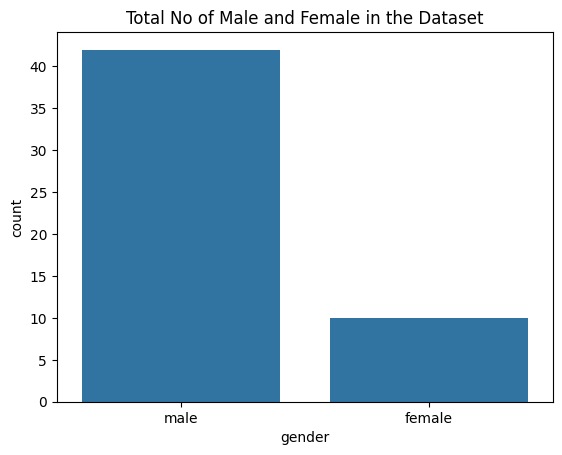

In [ ]:
sns.barplot(genders)
plt.title("Total No of Male and Female in the Dataset")
plt.show()

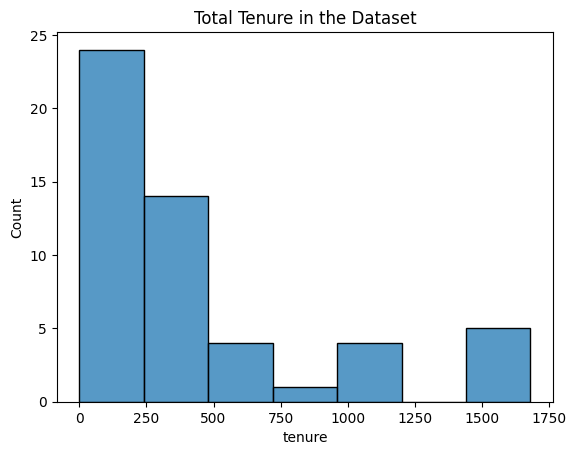

In [ ]:
sns.histplot(df.tenure)
plt.title("Total Tenure in the Dataset")
plt.show()

### Correlation Matrix

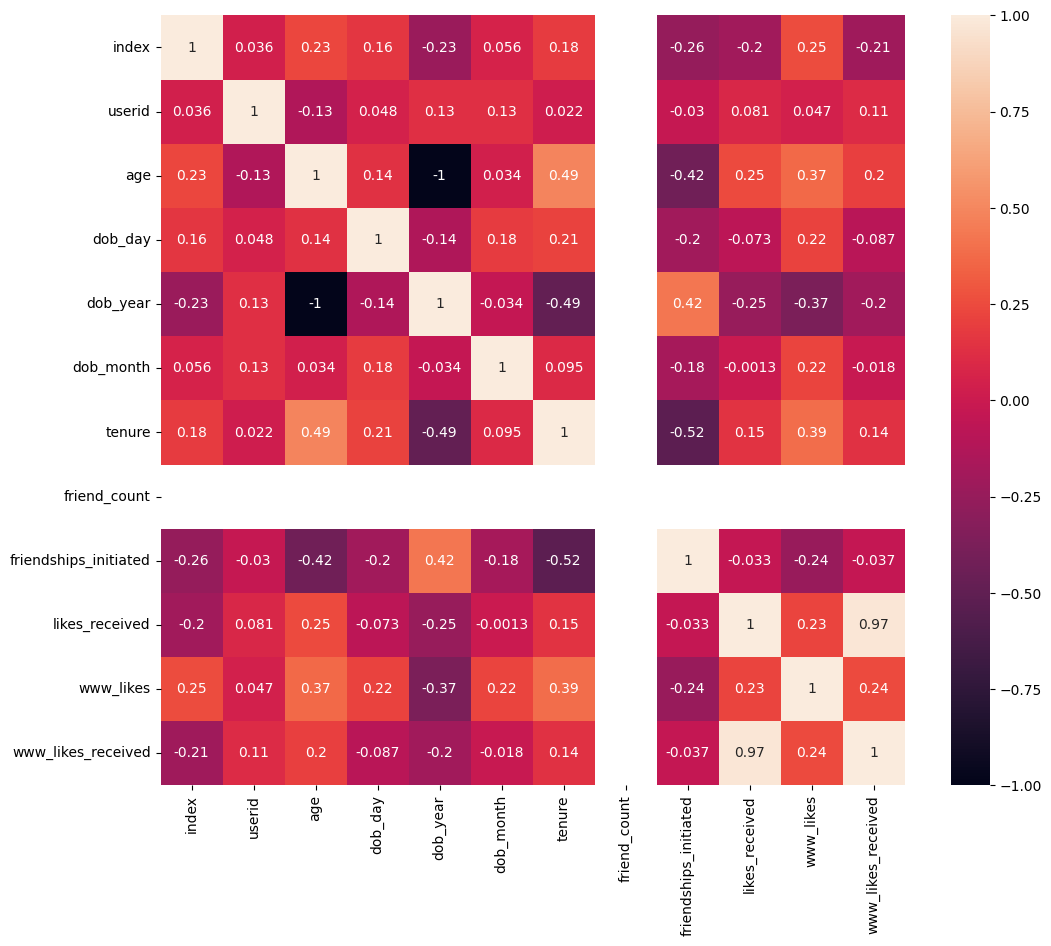

In [ ]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### ScatterPlot

In [ ]:
for i,col in enumerate(df.columns):
    print(i," => ",col)

0  =>  index
1  =>  userid
2  =>  age
3  =>  dob_day
4  =>  dob_year
5  =>  dob_month
6  =>  gender
7  =>  tenure
8  =>  friend_count
9  =>  friendships_initiated
10  =>  likes
11  =>  likes_received
12  =>  mobile_likes
13  =>  mobile_likes_received
14  =>  www_likes
15  =>  www_likes_received


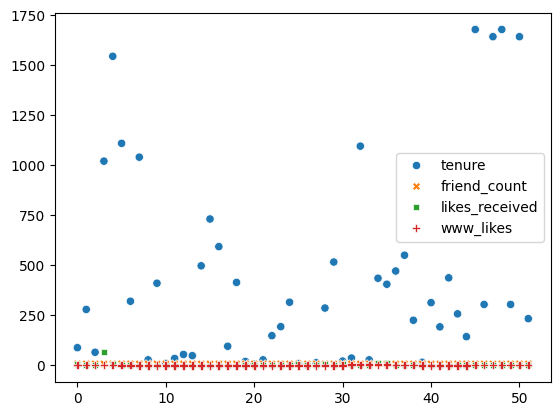

In [ ]:
sns.scatterplot(df.iloc[:,[7,8,10,11,12,13,14]])
plt.show()

### Graph G with Circular Layout

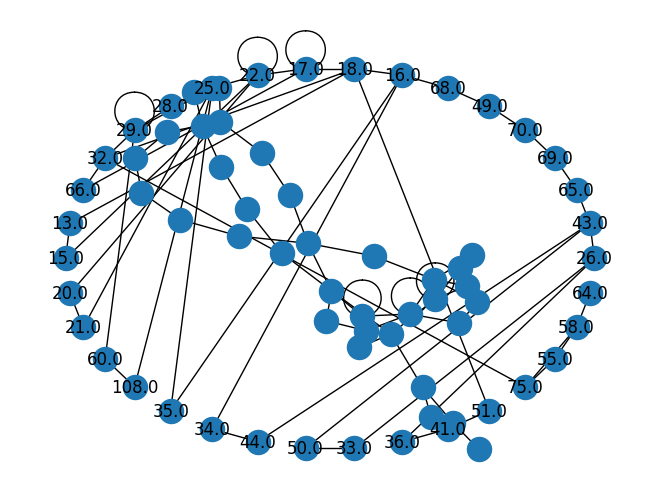

In [ ]:
G=nx.path_graph(df["age"])
pos=nx.draw_circular(G,with_labels=True)
nx.draw(G,pos)
plt.show()

### Graph G with a Random Layout

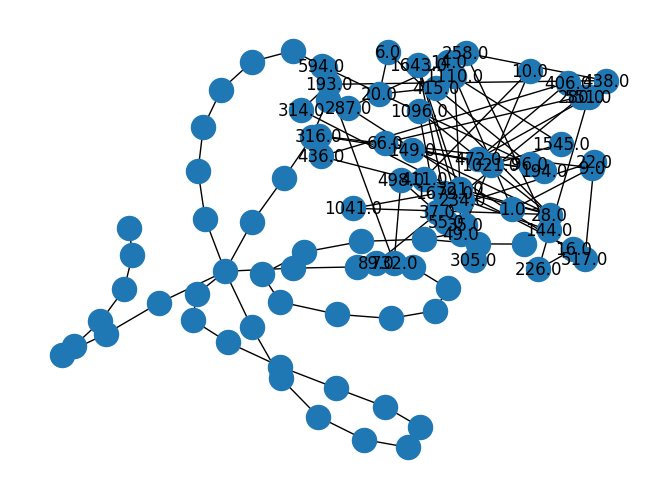

In [ ]:
G=nx.path_graph(df["tenure"])
pos=nx.draw_random(G,with_labels=True)
nx.draw(G,pos)
plt.show()

### Graph G with a Spectral 2D layout

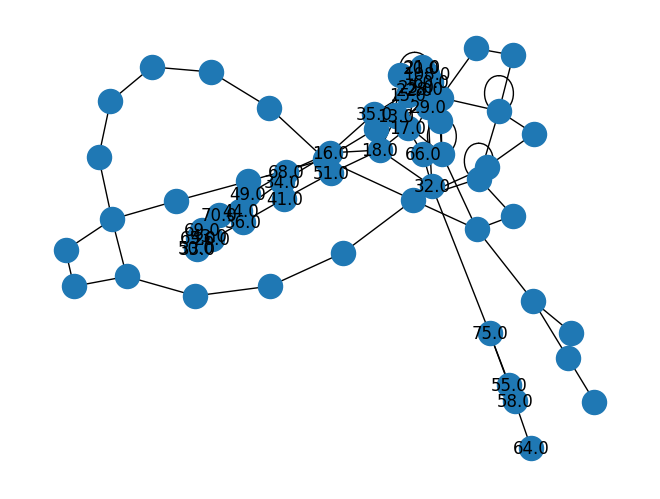

In [ ]:
G=nx.path_graph(df["age"])
pos=nx.draw_spectral(G,with_labels=True)
nx.draw(G,pos)
plt.show()

### Draw Graph with Spiral Layout

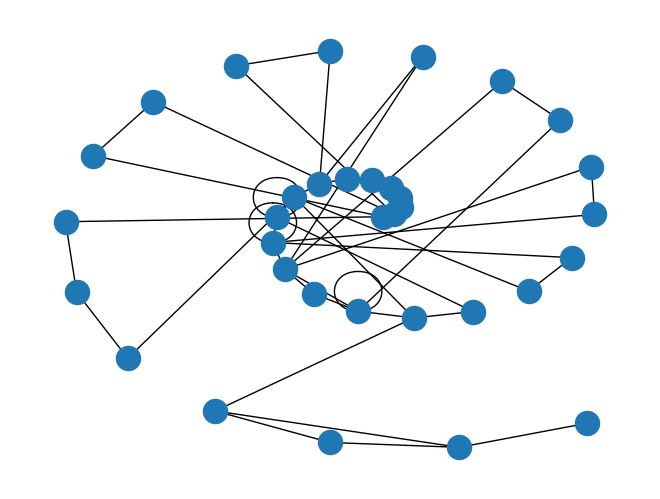

In [ ]:
G=nx.path_graph(df["age"])
pos=nx.spiral_layout(G)
nx.draw(G,pos)
plt.show()

### Graph G with shell layout

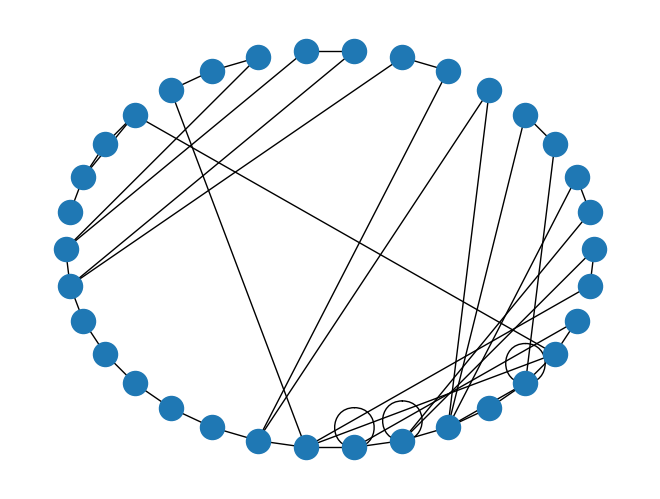

In [ ]:
G=nx.path_graph(df["age"])
pos=nx.shell_layout(G)
nx.draw(G,pos)
plt.show()